# Cities Distribution

In [2]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
#import plotly.graph_objects as go
from astropy.io import fits
from sklearn.metrics import mean_squared_error
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
from datetime import datetime
from scipy.stats import entropy

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
import math 
from reliability.Fitters import Fit_Weibull_2P

from reliability.Probability_plotting import plot_points

from reliability.Distributions import Weibull_Distribution

import pywt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False
from scipy.stats import entropy

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256))) 
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [6]:
df=pd.read_csv('ClimateData.csv').drop(columns=['Unnamed: 0'])

In [7]:
import haversine as hs 

In [8]:
city_df=df.drop_duplicates(subset='City')

In [9]:
CITIES=df.City.drop_duplicates().tolist()

In [10]:
DIS=[]
for city in CITIES:
    LAT=city_df[city_df.City==city].reset_index().loc[0].Latitude
    LONG=city_df[city_df.City==city].reset_index().loc[0].Longitude
    ref_loc=(LAT,LONG)
    DIS_CITY=[]
    for o_city in CITIES:
        new_lat=city_df[city_df.City==o_city].reset_index().loc[0].Latitude
        new_long=city_df[city_df.City==o_city].reset_index().loc[0].Longitude
        other_loc=(new_lat,new_long)
        DIS_CITY.append(hs.haversine(ref_loc,other_loc))
    DIS.append(DIS_CITY)

([<matplotlib.axis.XTick at 0x7fa38158b6a0>,
 [Text(0, 0, 'Abidjan'),
  Text(1, 0, 'Addis Abeba'),
  Text(2, 0, 'Ahmadabad'),
  Text(3, 0, 'Aleppo'),
  Text(4, 0, 'Alexandria'),
  Text(5, 0, 'Ankara'),
  Text(6, 0, 'Baghdad'),
  Text(7, 0, 'Bangalore'),
  Text(8, 0, 'Bangkok'),
  Text(9, 0, 'Belo Horizonte'),
  Text(10, 0, 'Berlin'),
  Text(11, 0, 'Bogotá'),
  Text(12, 0, 'Bombay'),
  Text(13, 0, 'Brasília'),
  Text(14, 0, 'Cairo'),
  Text(15, 0, 'Calcutta'),
  Text(16, 0, 'Cali'),
  Text(17, 0, 'Cape Town'),
  Text(18, 0, 'Casablanca'),
  Text(19, 0, 'Changchun'),
  Text(20, 0, 'Chengdu'),
  Text(21, 0, 'Chicago'),
  Text(22, 0, 'Chongqing'),
  Text(23, 0, 'Dakar'),
  Text(24, 0, 'Dalian'),
  Text(25, 0, 'Dar Es Salaam'),
  Text(26, 0, 'Delhi'),
  Text(27, 0, 'Dhaka'),
  Text(28, 0, 'Durban'),
  Text(29, 0, 'Faisalabad'),
  Text(30, 0, 'Fortaleza'),
  Text(31, 0, 'Gizeh'),
  Text(32, 0, 'Guangzhou'),
  Text(33, 0, 'Harare'),
  Text(34, 0, 'Harbin'),
  Text(35, 0, 'Ho Chi Minh City'),


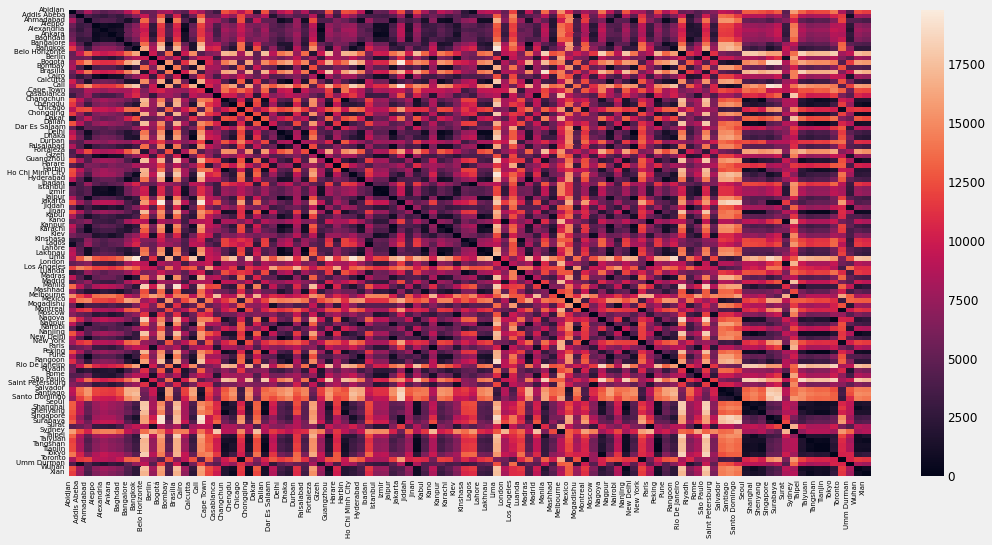

In [11]:
sns.heatmap(DIS)
#plt.xlabel(CITIES)
plt.yticks(np.arange(0,len(CITIES)),CITIES,fontsize=7,rotation=0)
plt.xticks(np.arange(0,len(CITIES)),CITIES,fontsize=7,rotation=90)

In [12]:
data_dis=pd.DataFrame(np.zeros((100,100)))
data_dis.columns=CITIES

In [13]:
data_dis.index=CITIES

In [14]:
k=0
for col in data_dis.columns.tolist():
    data_dis[col]=DIS[k]
    k+=1

In [15]:
data_dis

,Abidjan,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,Bangkok,Belo Horizonte,...,Sydney,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
Abidjan,0.000000,4734.630434,8406.284055,5419.387066,4557.566124,5326.430025,5880.088658,8968.050432,11422.408123,5189.070903,...,15941.668830,13238.325354,11912.364165,12281.499002,12231.530721,14094.151552,8424.086980,4144.060066,12349.341326,11737.917688
Addis Abeba,4734.630434,0.000000,3921.717339,3027.538079,2632.319199,3486.599674,2761.864953,4257.344365,6733.478075,9596.245806,...,12633.070508,8864.849753,7973.489527,8465.683312,8381.576911,10400.849413,11479.365202,1004.700262,8119.565553,7627.694345
Ahmadabad,8406.284055,3921.717339,0.000000,3697.730858,4294.575837,4164.657776,2979.328003,1235.674206,3113.548241,13489.168480,...,10436.488640,4952.688912,4132.440216,4648.279563,4555.265701,6538.076711,12067.996575,4273.290163,4200.942433,3739.737196
Aleppo,5419.387066,3027.538079,3697.730858,0.000000,872.078646,559.861460,733.394215,4782.480034,6728.568636,10543.273187,...,14124.462987,7923.629317,6498.751749,6862.740793,6812.144359,8714.591873,9069.342015,2332.257248,6996.342717,6361.092643
Alexandria,4557.566124,2632.319199,4294.575837,872.078646,0.000000,1005.912656,1380.862288,5266.576954,7391.648831,9706.009897,...,14581.706055,8746.462322,7355.399826,7728.255279,7675.893743,9586.360005,9027.327423,1749.356662,7828.279096,7200.316380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tokyo,14094.151552,10400.849413,6538.076711,8714.591873,9586.360005,8769.088002,8354.228473,6667.705149,4609.248074,18225.621329,...,7823.403838,2103.474192,2427.365884,1945.094895,2023.725769,0.000000,10346.318478,10486.223596,2429.599640,2799.448579
Toronto,8424.086980,11479.365202,12067.996575,9069.342015,9027.327423,8509.483347,9733.901973,13298.177726,13631.625533,7939.157950,...,15566.223605,12083.263449,10870.721623,10588.145456,10665.187578,10346.318478,0.000000,10474.880281,11642.312440,11300.934502
Umm Durman,4144.060066,1004.700262,4273.290163,2332.257248,1749.356662,2699.640230,2299.191837,4861.090646,7286.246403,9237.090005,...,13602.019845,9189.535813,8088.652118,8544.317791,8471.069058,10486.223596,10474.880281,0.000000,8363.757440,7808.837720
Wuhan,12349.341326,8119.565553,4200.942433,6996.342717,7828.279096,7212.240885,6475.395832,4238.326148,2346.183876,17533.016898,...,8146.462098,944.099654,824.808973,1064.291135,980.223049,2429.599640,11642.312440,8363.757440,0.000000,653.401140
